In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/mnt/c/Users/buzga/Desktop/School/grad_school/spring_2023/prob_stats_2/homework/homework_5/ANSUR II MALE Public.csv', encoding='latin-1')
data=data[['footlength',    'stature']].values
data.shape

(4082, 2)

gaussina bounds is,  [0.40307007477155293, 0.8680068126675036]
percentile bound is,  [0.278377885134989, 0.904022457983695]
true population corelation coef is,  0.718083551334714


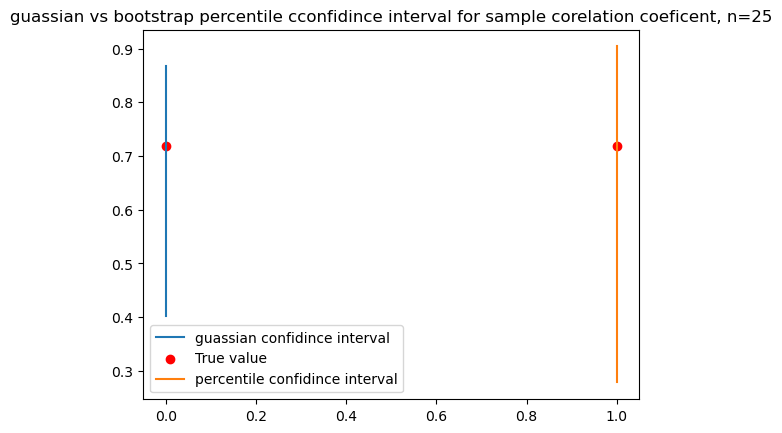

In [3]:
rng=np.random.default_rng()
number_samples=25
number_bootstraps=200
alpha=0.05
sample=rng.choice(data, size=number_samples) ## sample of size n from data
boot_straps=rng.choice(sample, size=( number_bootstraps,number_samples)) ## k bootstraps of size n from sample
boot_strap_covariacne=np.array([np.corrcoef(boot_strap[:,0 ],boot_strap[:,1])[0][1] for boot_strap in boot_straps])
sample_cov=np.corrcoef(sample[:,0 ],sample[:,1])[0][1]
population_cov=np.corrcoef(data[:,0 ],data[:,1])[0][1]
## construct Gaussian
boostrap_standard_error=np.std(boot_strap_covariacne)
c_alpha=stats.norm.ppf(1- alpha/2 )
sample_cov=np.corrcoef(sample[:,0 ],sample[:,1])[0][1]
guassian_bound=[sample_cov-boostrap_standard_error*c_alpha,sample_cov+boostrap_standard_error*c_alpha ]
print("gaussina bounds is, ", guassian_bound)
## percentile ci
q_alpha_over_2=np.percentile(boot_strap_covariacne, (alpha/50))
q_one_minus_alpha_over_2=np.percentile(boot_strap_covariacne, (100-(alpha/50)))
percentile_bound=[q_alpha_over_2,q_one_minus_alpha_over_2]
print("percentile bound is, ", percentile_bound)

print("true population corelation coef is, ", np.corrcoef(data[:,0 ],data[:,1])[0][1])
a=[guassian_bound, percentile_bound]
x=range(2)
plt.plot([x[0], x[0]], a[0] , label="guassian confidince interval")
plt.scatter([x[0]], np.corrcoef(data[:,0],data[:,1])[0][1], label="True value", c="r")
x=range(2)
plt.plot([x[1], x[1]], a[1], label="percentile confidince interval")
plt.scatter([x[1]], np.corrcoef(data[:,0],data[:,1])[0][1],  c="r")
plt.title("guassian vs bootstrap percentile cconfidince interval for sample corelation coeficent, n=25")
plt.legend()
plt.show()

gaussina bounds is,  [0.5622732307874051, 0.790502821051641]
percentile bound is,  [0.434905097495743, 0.815486900232032]
true population corelation coef is,  0.718083551334714


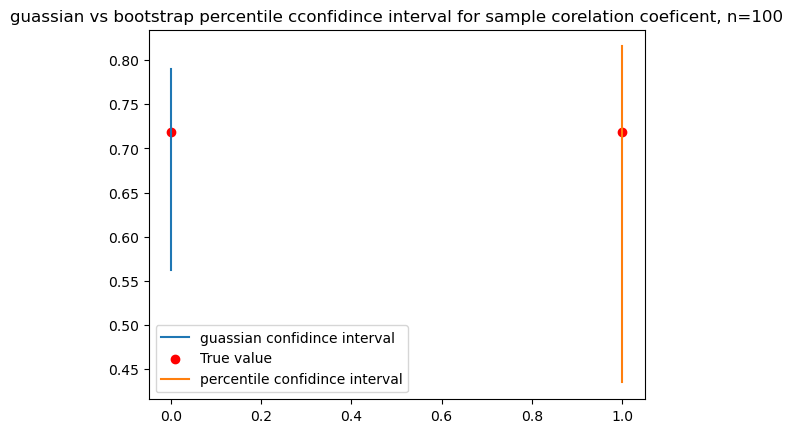

In [5]:
rng=np.random.default_rng()
number_samples=100
number_bootstraps=200
alpha=0.05
sample=rng.choice(data, size=number_samples) ## sample of size n from data
boot_straps=rng.choice(sample, size=( number_bootstraps,number_samples)) ## k bootstraps of size n from sample
boot_strap_covariacne=np.array([np.corrcoef(boot_strap[:,0 ],boot_strap[:,1])[0][1] for boot_strap in boot_straps])
sample_cov=np.corrcoef(sample[:,0 ],sample[:,1])[0][1]
population_cov=np.corrcoef(data[:,0 ],data[:,1])[0][1]
## construct Gaussian
boostrap_standard_error=np.std(boot_strap_covariacne)
c_alpha=stats.norm.ppf(1- alpha/2 )
sample_cov=np.corrcoef(sample[:,0 ],sample[:,1])[0][1]
guassian_bound=[sample_cov-boostrap_standard_error*c_alpha,sample_cov+boostrap_standard_error*c_alpha ]
print("gaussina bounds is, ", guassian_bound)
## percentile ci
q_alpha_over_2=np.percentile(boot_strap_covariacne, (alpha/50))
q_one_minus_alpha_over_2=np.percentile(boot_strap_covariacne, (100-(alpha/50)))
percentile_bound=[q_alpha_over_2,q_one_minus_alpha_over_2]
print("percentile bound is, ", percentile_bound)

print("true population corelation coef is, ", np.corrcoef(data[:,0 ],data[:,1])[0][1])
a=[guassian_bound, percentile_bound]
x=range(2)
plt.plot([x[0], x[0]], a[0] , label="guassian confidince interval")
plt.scatter([x[0]], np.corrcoef(data[:,0],data[:,1])[0][1], label="True value", c="r")
x=range(2)
plt.plot([x[1], x[1]], a[1], label="percentile confidince interval")
plt.scatter([x[1]], np.corrcoef(data[:,0],data[:,1])[0][1],  c="r")
plt.title("guassian vs bootstrap percentile cconfidince interval for sample corelation coeficent, n=100")
plt.legend()
plt.show()

In [9]:
rng=np.random.default_rng()
number_samples=25
number_bootstraps=200
alpha=0.05
gaussian_acc=0
percentile_acc=0
number_trials=10000
#print("population_cov:", population_cov)
for i in range(number_trials):
    sample=rng.choice(data, size=number_samples) ## sample of size n from data
    boot_straps=rng.choice(sample, size=( number_bootstraps,number_samples)) ## k bootstraps of size n from sample
    boot_strap_covariacne=np.array([np.corrcoef(boot_strap[:,0 ],boot_strap[:,1])[0][1] for boot_strap in boot_straps])
    sample_cov=np.corrcoef(sample[:,0 ],sample[:,1])[0][1]
    population_cov=np.corrcoef(data[:,0 ],data[:,1])[0][1]
    ## construct Gaussian
    boostrap_standard_error=np.std(boot_strap_covariacne)
    c_alpha=stats.norm.ppf(1- alpha/2 )
    sample_cov=np.corrcoef(sample[:,0 ],sample[:,1])[0][1]
    guassian_bound=[sample_cov-boostrap_standard_error*c_alpha,sample_cov+boostrap_standard_error*c_alpha ]
    #print("gaussina bounds is, ", guassian_bound)
    ## percentile ci
    percentile_ci_upper = np.sort(boot_strap_covariacne)[int(.975*len(boot_strap_covariacne))]
    percentile_ci_lower = np.sort(boot_strap_covariacne)[int(.025*len(boot_strap_covariacne))]
    percentile_bound=[percentile_ci_lower,percentile_ci_upper]
    #print("percentile bound is, ", percentile_bound)
    if(guassian_bound[0]<=population_cov and guassian_bound[1]>=population_cov):
        gaussian_acc+=1
    if(percentile_bound[0]<=population_cov and percentile_bound[1]>=population_cov):
        percentile_acc+=1
print("gaussian accuracy is: ", gaussian_acc/number_trials)
print("percentile accuacy is: ", percentile_acc/number_trials)


gaussian accuracy is:  0.9043
percentile accuacy is:  0.9181


In [11]:
data=pd.read_csv('/mnt/c/Users/buzga/Desktop/School/grad_school/spring_2023/prob_stats_2/homework/homework_5/ANSUR II MALE Public.csv', encoding='latin-1')
data=data[[ 'stature']].values
data.shape

(4082, 1)

true population corelation var is,  4698.059287064948


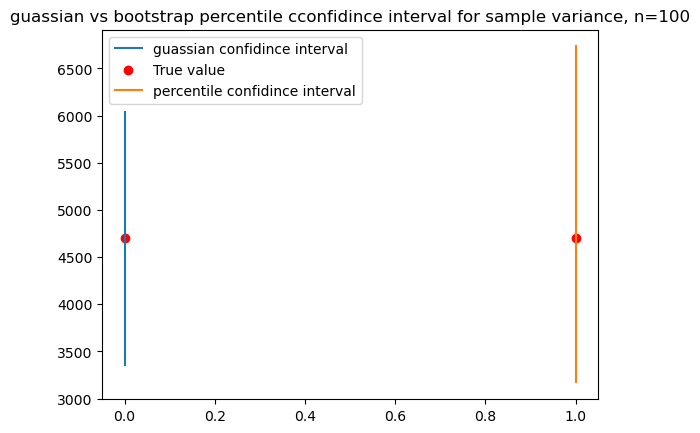

In [12]:
def gaussian_bootstrap_varinace(n,rng):
    alpha=.05
    sample=rng.choice(data, size=n)
    sample_variance=np.var(data)
    booystraps=rng.choice(data, size=(200,n), replace=True)
    bootstrap_variance=[np.var(bootstrap) for bootstrap in booystraps]
    c_alpha=stats.norm.ppf(1- alpha/2 )
    bootstrap_se=np.std(bootstrap_variance)
    return [sample_variance-c_alpha*bootstrap_se, sample_variance+c_alpha*bootstrap_se]
rng=np.random.default_rng()
gaussian_bound=gaussian_bootstrap_varinace(100,rng)
def percentile_bootstrap_varinace(n,rng):
    alpha=.05
    sample=rng.choice(data, size=n)
    sample_variance=np.var(data)
    booystraps=rng.choice(data, size=(200,n), replace=True)
    bootstrap_variance=[np.var(bootstrap) for bootstrap in booystraps]
    q_alpha_over_2=np.percentile(bootstrap_variance, (alpha/50))
    q_one_minus_alpha_over_2=np.percentile(bootstrap_variance, (100-(alpha/50)))
    return [q_alpha_over_2,q_one_minus_alpha_over_2]
    
pecentile_bound=percentile_bootstrap_varinace(100,rng)
print("true population corelation var is, ", np.var(data))
a=[gaussian_bound, pecentile_bound]
x=range(2)
plt.plot([x[0], x[0]], a[0] , label="guassian confidince interval")
plt.scatter([x[0]], np.var(data), label="True value", c="r")
x=range(2)
plt.plot([x[1], x[1]], a[1], label="percentile confidince interval")
plt.scatter([x[1]],np.var(data),  c="r")
plt.title("guassian vs bootstrap percentile cconfidince interval for sample variance, n=100")
plt.legend()
plt.show()


In [20]:
number_trials=10000
percentile_acc=0
n=100
gaussian_acc=0
population_var=np.var(data)
rng=np.random.default_rng()
for i in range(number_trials):
    alpha=.05
    sample=rng.choice(data, size=n)
    sample_variance=np.var(data)
    booystraps=rng.choice(sample, size=(100,n), replace=True)
    bootstrap_variance=[np.var(bootstrap) for bootstrap in booystraps]
    c_alpha=stats.norm.ppf(1- alpha/2 )
    bootstrap_se=np.std(bootstrap_variance)
    guassian_bound= [sample_variance-c_alpha*bootstrap_se, sample_variance+c_alpha*bootstrap_se]
    percentile_ci_upper = np.sort(bootstrap_variance)[int(.975*len(bootstrap_variance))]
    percentile_ci_lower = np.sort(bootstrap_variance)[int(.025*len(bootstrap_variance))]
    pecentile_bound= [percentile_ci_lower,percentile_ci_upper]
    #print(guassian_bound)
    if(guassian_bound[0]<=population_var and guassian_bound[1]>=population_var):
        gaussian_acc+=1
    if(pecentile_bound[0]<=population_var and pecentile_bound[1]>=population_var):
        percentile_acc+=1
print("gaussian accuracy is: ", gaussian_acc/number_trials)
print("percentile accuacy is: ", percentile_acc/number_trials)

gaussian accuracy is:  1.0
percentile accuacy is:  0.9152


In [17]:
percentile_acc

10000